# Исследование надежности заемщиков



## Описание проекта

Заказчик — кредитный отдел банка. Входные данные от банка — статистика о платёжеспособности клиентов.

**Цель исследования** - разобраться, какие факторы влияют на факт погашения кредита в срок.

**Задача данного исследования** - оценить зависимость между:

* количеством детей и возвратом кредита в срок;
* семейным положением и возвратом кредита в срок;
* уровнем дохода и возвратом кредита в срок;
* целью кредита и возвратом кредита в срок.

**Ход исследования:**

В первую очередь рассмотрим основную информацию о датафрейме, найдём и заполним пропущенные значения в зависимости от формата данных, а также с учётом связей с другими столбцами. Далее проверим данные на наличие дубликатов и аномалий (значений, которые не отражают действительность и появились по какой-то ошибке). Также изменим типы данных там, где это необходимо для дальнейших расчётов. Перед оценкой зависимостей выделим категории по доходам клиентов и по целям кредитования. В основной части исследования попробуем выявить зависимость между количеством детей, семейным положением, уровнем дохода, целью кредита и возвратом кредита в срок. В конце сформулируем общий вывод по проведённому анализу.

Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## Изучение общей информации о данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='svg'
%matplotlib inline

try:
    data = pd.read_csv('/Users/polzovatel/Desktop/Проекты Яндекс доработка/Bank credit history/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

In [2]:
data.head(20)
# выведем первые 20 строчек датафрейма data

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [3]:
data.info()
# выведем основную информацию о датафрейме с помощью метода info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

Возможные **причины** появления пропусков в данных:

- технические, например, неудачно написанный код для загрузки данных с сервера;
- человеческий фактор при сборе и заполнении информации о клиентах;
- личные цели клиентов банка, которые умышленно оставили пропуски при заполнении анкеты.

In [4]:
data.isna().sum()
# выведем количество пропущенных значений для каждого столбца

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

В двух столбцах есть пропущенные значения. Один из них — `total_income`. `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца income_type.

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()
# заполнение пропущенных значений в столбце total_income    

### Обработка аномальных значений

В данных могут встречаться **артефакты (аномалии)** — значения, которые не отражают действительность и появились по какой-то ошибке. Таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Заменим все отрицательные значения положительными с помощью метода abs().

In [6]:
data['days_employed'] = data['days_employed'].abs()
# замена всех отрицательных значений в столбце days_employed

Для каждого типа занятости выведем медианное значение трудового стажа `days_employed` в днях.

In [7]:
data.groupby('income_type')['days_employed'].agg('median')
# группировка по типам занятости с подсчётом медианного трудового стажа

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов *(безработные и пенсионеры)* получатся аномально большие значения. Исправить такие значения сложно, поэтому оставим их как есть. Этот столбец не понадобится нам для исследования.

In [8]:
data['children'].unique()
# выведем перечень уникальных значений столбца children

array([ 1,  0,  3,  2, -1,  4, 20,  5])

В столбце `children` есть два аномальных значения. Удалим строки, в которых встречаются такие аномальные значения из датафрейма data.

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]
# удаление аномальных значений в столбце children

In [10]:
data['children'].unique()
# проверка данных

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

Поскольку переменные `days_employed` и `total_income` являются количественными, наиболее подходящими методами для заполнения пропусков являются среднее арифметическое и медиана. Учитывая наличие выбросов в данных, более корректным выбором будет использование медианы, поскольку среднее арифметическое более чувствительно к воздействию выбросов, чем медианное значение.

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()
# заполним пропуски в столбце days_employed медианными значениями по каждого типа занятости income_type    

In [12]:
data.isna().sum()
# убедимся, что все пропуски заполнены

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

Заменим вещественный тип данных в столбце `total_income` на целочисленный с помощью метода astype().

In [13]:
data['total_income'] = data['total_income'].astype(int)
# изменение типа данных

### Обработка дубликатов

Обработаем неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведём их к нижнему регистру. Проверим остальные столбцы.

In [14]:
data['education'] = data['education'].str.lower()
# перевод в нижний регистр

In [15]:
data.duplicated().sum()
# количество строк-дубликатов в данных

71

In [16]:
data = data.drop_duplicates()
# удаление явных дубликатов

## Категоризация данных

На основании диапазонов, указанных ниже, создадим в датафрейме data столбец `total_income_category` с категориями:

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


Например, кредитополучателю с доходом 25000 назначим категорию **'E'**, а клиенту, получающему 235000, — **'B'**. Используем собственную функцию с именем *categorize_income()* и метод apply().

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)
# применение функции categorize_income() к столбцу total_income

In [19]:
data['purpose'].unique()
# перечень уникальных целей взятия кредита из столбца purpose

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:

* 'операции с автомобилем',
* 'операции с недвижимостью',
* 'проведение свадьбы',
* 'получение образования'.

Например, если в столбце purpose находится подстрока *'на покупку автомобиля'*, то в столбце `purpose_category` должна появиться строка **'операции с автомобилем'**.
Используем собственную функцию с именем *categorize_purpose()* и метод apply(). Изучим данные в столбце `purpose` и определим, какие подстроки помогут нам правильно определить категорию.

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)
# применение функции categorize_purpose() к столбцу purpose

## Исследовательский анализ данных

### Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [22]:
data.pivot_table(index='children', values='debt', aggfunc=['mean', 'count'])
# создание сводной таблицы

,mean,count
,debt,debt
children,,
0,0.075438,14091
1,0.092346,4808
2,0.094542,2052
3,0.081818,330
4,0.097561,41
5,0.000000,9


В данной выборке мало клиентов, у которых больше двух детей. Для проведения адекватного сравнения данных между разными группами, мы можем объединить семьи с тремя и более детьми, с семьями, в которых два ребёнка. Таким образом, мы разделим всех клиентов на *три основные группы*: без детей, с 1 ребёнком и многодетных.

In [23]:
data['children_category'] = data['children'].apply(lambda x: 'нет детей' if x==0 else ('1 ребёнок' if x==1 else 'многодетная семья'))
# применение лямбда-функции для категоризации клиентов по числу детей 

In [24]:
children_data = (data.pivot_table(index='children_category', values='debt', aggfunc=['mean', 'count'])
                     .round(3)
                     .reset_index()
                )
# создание сводной таблицы
children_data.columns = ['children_category', 'share_with_debt', 'number_of_borrowers']
# переименование колонок
children_data['share_with_debt'] = children_data['share_with_debt'].map(lambda x: '{:.1%}'.format(x))
# изменение формата представления данных
children_data

,children_category,share_with_debt,number_of_borrowers
0,1 ребёнок,9.2%,4808
1,многодетная семья,9.3%,2432
2,нет детей,7.5%,14091


Text(0.5, 0, '')

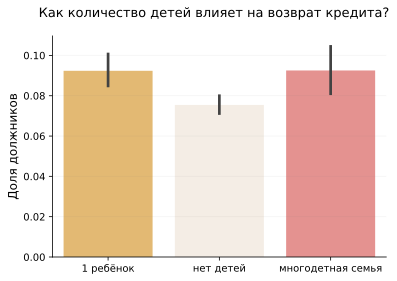

In [25]:
fig = plt.figure(figsize=(6, 4))
fig.suptitle('Как количество детей влияет на возврат кредита?', fontsize=13)
ax1 = fig.add_subplot(1, 1, 1)
ax1.spines['top'].set_visible(False) 
ax1.spines['right'].set_visible(False)
ax1.grid(which='major', linewidth=1, color='gray', alpha=0.07)
sns.barplot(data=data, x='children_category', y='debt', palette=['#f6bd60', '#f7ede2', '#f28482'])
ax1.set_ylabel('Доля должников', fontsize=12)
ax1.set_xlabel(None)
# построение столбчатой диаграммы

**Вывод:**

Клиенты банка, **не имеющие детей**, чаще выплачивают кредиты в срок по сравнению с клиентами, у которых есть дети. Среди них всего лишь *7.5%* являются должниками. С увеличением количества детей в семье, у клиентов возрастает денежная нагрузка, увеличиваются расходы и вероятность возникновения у них задолженности по кредитам в будущем.

### Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [26]:
status_data = (data.pivot_table(index='family_status', values='debt', aggfunc=['mean', 'count'])
                   .round(3)
                   .reset_index()
                )
status_data.columns = ['family_status', 'share_with_debt', 'number_of_borrowers']
status_data['share_with_debt'] = status_data['share_with_debt'].map(lambda x: '{:.1%}'.format(x))
# создание сводной таблицы
status_data

,family_status,share_with_debt,number_of_borrowers
0,Не женат / не замужем,9.8%,2796
1,в разводе,7.1%,1189
2,вдовец / вдова,6.6%,951
3,гражданский брак,9.3%,4134
4,женат / замужем,7.6%,12261


Text(0.5, 0.98, 'Как семейное положение влияет на возврат кредита?')

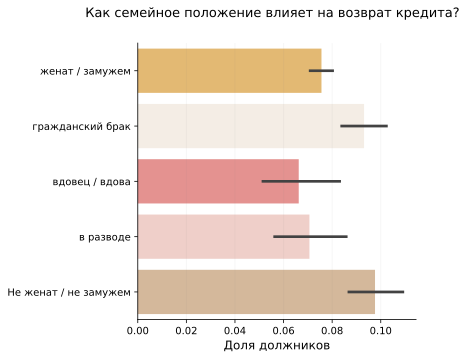

In [27]:
fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(1, 1, 1)
ax1.spines['top'].set_visible(False) 
ax1.spines['right'].set_visible(False)
ax1.grid(which='major', linewidth=1, color='gray', alpha=0.07)
sns.barplot(data=data, 
            y='family_status', 
            x='debt', 
            palette=['#f6bd60', '#f7ede2', '#f28482', '#f5cac3', '#ddb892'], 
            orient='h')
ax1.set_ylabel(None)
ax1.set_xlabel('Доля должников', fontsize=12)
fig.suptitle('Как семейное положение влияет на возврат кредита?', fontsize=13)
# построение столбчатой диаграммы

**Вывод:**

Клиенты банка, находящиеся **в официальном браке**, обычно чаще возвращают кредиты по сравнению с неженатыми/незамужними клиентами, а также теми, кто живет в гражданском браке. Вероятно, семейные пары обдумывают свои финансовые решения более ответственно и избегают рисков, расчитывая свой бюджет заранее. Процент должников среди **вдовцов/вдов и разведённых** лиц также низок и составляет *6.6% и 7.1%* соответственно. Кроме того, можно предположить, что существует связь между *возрастом и семейным статусом*, поскольку молодые люди чаще находятся в гражданском браке или не состоят в официальном браке.

### Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [28]:
data.pivot_table(index='total_income_category', values='debt', aggfunc=['mean', 'count'])
# создание сводной таблицы

,mean,count
,debt,debt
total_income_category,,
A,0.080000,25
B,0.070602,5014
C,0.084982,15921
D,0.060172,349
E,0.090909,22


Группы 'A', 'D' и 'E' содержат очень мало данных по сравнению с другими уровнями дохода. Для анализа зависимостей оставим в таблице только две категории с достаточно большим количеством клиентов: **'B' и 'C'**. Категория 'C' включает клиентов с ежемесячным доходом *от 50001 до 200000 рублей*, а категория 'B' охватывает клиентов с доходом *от 200001 до 1000000 рублей*.

In [29]:
income_data = (data.query('total_income_category in ("B", "C")')
                   .pivot_table(index='total_income_category', values='debt', aggfunc=['mean', 'count'])
                   .round(3)
                   .reset_index()
                )
income_data.columns = ['income_category', 'share_with_debt', 'number_of_borrowers']
income_data['share_with_debt'] = income_data['share_with_debt'].map(lambda x: '{:.1%}'.format(x))
# создание сводной таблицы
income_data

,income_category,share_with_debt,number_of_borrowers
0,B,7.1%,5014
1,C,8.5%,15921


Text(0.5, 0.98, 'Как уровень дохода влияет на возврат кредита?')

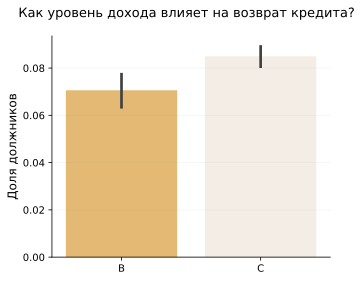

In [30]:
fig = plt.figure(figsize=(5, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.spines['top'].set_visible(False) 
ax1.spines['right'].set_visible(False)
ax1.grid(which='major', linewidth=1, color='gray', alpha=0.07)
sns.barplot(data=data.query('total_income_category in ("B", "C")'), 
                            x='total_income_category', 
                            y='debt', 
                            palette=['#f6bd60', '#f7ede2'])
ax1.set_xlabel(None)
ax1.set_ylabel('Доля должников', fontsize=12)
fig.suptitle('Как уровень дохода влияет на возврат кредита?', fontsize=13)
# построение столбчатой диаграммы

**Вывод:**

Чаще всего задолженности по возврату кредитов возникают у клиентов из категории 'C'. Наименьший процент должников отмечается среди клиентов из **категории 'B'**, всего *7.1%*. Из графика, представленного выше, можно заключить, что группа клиентов с более высоким ежемесячным доходом чаще выплачивает кредиты в срок. Однако нельзя делать однозначные выводы о наличии прямой зависимости между ежемесячным доходом и своевременным возвратом кредита, поскольку данных *по другим категориям в выборке недостаточно*.

Посмотрим как доля должников зависит от типа занятости на разных уровнях доходов, добавим в таблицу группировку по столбцу `income_type`.

In [31]:
income_type_data = (data.query('total_income_category in ("B", "C")')
                   .groupby(['total_income_category', 'income_type'])
                   .agg(share_with_debt=('debt', 'mean'), number_of_borrowers=('debt', 'count'))
                   .round(3)
                   .reset_index()
                )
income_type_data['share_with_debt'] = income_type_data['share_with_debt'].map(lambda x: '{:.1%}'.format(x))
# создание сводной таблицы
income_type_data

,total_income_category,income_type,share_with_debt,number_of_borrowers
0,B,безработный,0.0%,1
1,B,госслужащий,4.9%,366
2,B,компаньон,6.3%,1733
3,B,пенсионер,5.6%,552
4,B,предприниматель,0.0%,2
5,B,сотрудник,8.3%,2360
6,C,безработный,100.0%,1
7,C,в декрете,100.0%,1
8,C,госслужащий,6.3%,1060
9,C,компаньон,8.0%,3273


Оставим типы занятости с достаточным количеством данных: *"госслужащий", "компаньон", "пенсионер", "сотрудник"*.

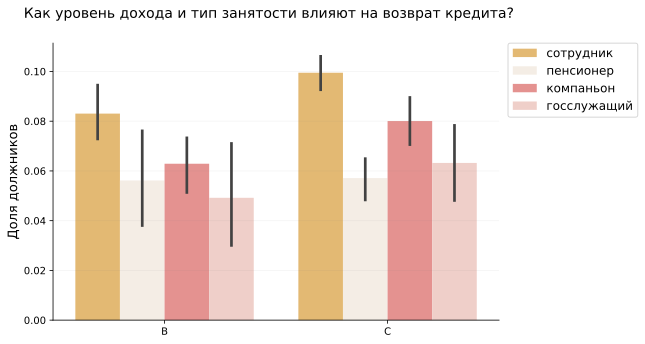

In [32]:
fig = plt.figure(figsize=(8, 5))
ax1 = fig.add_subplot(1, 1, 1)
ax1.spines['top'].set_visible(False) 
ax1.spines['right'].set_visible(False)
ax1.grid(which='major', linewidth=1, color='gray', alpha=0.07)
sns.barplot(data=data.query('total_income_category in ("B", "C") and income_type in ("госслужащий", "компаньон", "пенсионер", "сотрудник")'), 
            x='total_income_category', 
            y='debt',
            hue='income_type',
            palette=['#f6bd60', '#f7ede2', '#f28482', '#f5cac3', '#ddb892'])
ax1.set_xlabel(None)
ax1.set_ylabel('Доля должников', fontsize=13)
fig.suptitle('Как уровень дохода и тип занятости влияют на возврат кредита?', fontsize=14)
ax1.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize=12)
# построение столбчатой диаграммы

**Вывод:**

**Пенсионеры и госслужащие** на разных уровнях доходов являются наиболее надежными заёмщиками, в то время как сотрудники показывают более низкую надежность в выплате своих кредитов по сравнению с остальными группами.

### Как разные цели кредита влияют на его возврат в срок?

In [33]:
purpose_data = (data.pivot_table(index='purpose_category', values='debt', aggfunc=['mean', 'count'])
                   .round(3)
                   .reset_index()
                )
purpose_data.columns = ['purpose_category', 'share_with_debt', 'number_of_borrowers']
purpose_data['share_with_debt'] = purpose_data['share_with_debt'].map(lambda x: '{:.1%}'.format(x))
# создание сводной таблицы
purpose_data

,purpose_category,share_with_debt,number_of_borrowers
0,операции с автомобилем,9.3%,4279
1,операции с недвижимостью,7.3%,10751
2,получение образования,9.3%,3988
3,проведение свадьбы,7.9%,2313


Text(0.5, 0.98, 'Как цель кредита влияет на его возврат?')

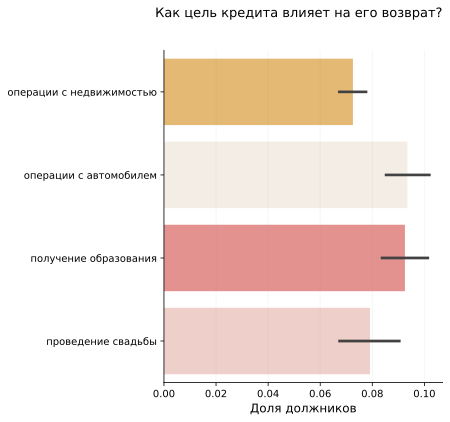

In [34]:
fig = plt.figure(figsize=(5, 6))
ax1 = fig.add_subplot(1, 1, 1)
ax1.spines['top'].set_visible(False) 
ax1.spines['right'].set_visible(False)
ax1.grid(which='major', linewidth=1, color='gray', alpha=0.07)
sns.barplot(data=data, 
            y='purpose_category', 
            x='debt', 
            palette=['#f6bd60', '#f7ede2', '#f28482', '#f5cac3'], 
            orient='h')
ax1.set_ylabel(None)
ax1.set_xlabel('Доля должников', fontsize=12)
fig.suptitle('Как цель кредита влияет на его возврат?', fontsize=13)
# построение столбчатой диаграммы

**Вывод:**

Клиенты с кредитами на образование или приобретение автомобиля чаще имеют задолженности по кредитам, чем клиенты, оформляющие кредиты для **операций с недвижимостью или свадьбы**. Предположительно, молодые клиенты банка, целью которых является получение образования, изначально имеют ограниченные финансовые возможности для своевременных выплат по кредитам, в отличие от клиентов с трудовым опытом и стабильным доходом. В то же время, покупкой коммерческой или жилой недвижимости чаще интересуются семьи, которые подходят к вопросу погашения кредитов более ответственно.

## Общий вывод

У клиентов банка, у которых **нет детей** и, следовательно, больше финансовых возможностей для погашения кредитов, риск невыплаты кредита ниже. Также клиенты, находящиеся **в официальном браке**, более ответственно контролируют свои расходы и реже имеют задолженности, чем неженатые/незамужние клиенты. Доля должников среди разведённых клиентов *(7.1%)* и вдовцов/вдов *(6.6%)* тоже невелика.

Клиенты с ежемесячным **доходом от 200001 до 1000000 рублей** (категория 'B') реже становятся должниками по сравнению с клиентами из категории 'C' с заработком от 50001 до 200000 рублей. Однако, данные по другим категориям дохода недостаточны для оценки полной картины взаимосвязи доходов и риска невыплаты кредитов. Важно отметить, что **пенсионеры и госслужащие** выплачивают кредиты чаще по сравнению с компаньонами и сотрудниками.

Процент должников, оформляющих кредиты для операций **с недвижимостью** *(7.3%)* **и свадьбы** *(7.9%)*, меньше, чем среди клиентов, берущих кредиты на образование *(9.3%)* и покупку автомобиля *(9.3%)*. Семьи, планирующие свои расходы заранее, более заинтересованы в приобретении недвижимости, в то время как молодые люди без стабильного дохода чаще обращаются за кредитами на образование.